<img src="../img/hu-logo.png" align="right" width="120">

# Motivation: Representations

- What is the effect of feature representations on model outputs?
- How do representations affect the model specification?

In [1]:
import graphviz
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import sklearn.decomposition
import sklearn.tree

In [2]:
plt.rcParams.update(
    {
        "figure.figsize": (9, 9),
        "axes.titlesize": 20,
        "axes.labelsize": 15,
        "legend.fontsize": 15,
        "axes.grid": True,
        "axes.axisbelow": True,
        "pcolor.shading": "auto",
    }
)

<br>
<br>

## Generate data

### Data are located on two concentric circles

The data we generate here is similar to the data set we studied in lecture 4 (binary logistic regression). We create two classes of data points, located on two concentric circles.

In [3]:
np.random.seed(501)
X, y = sklearn.datasets.make_circles(n_samples=2_000, factor=0.2, noise=0.12)

### Plot

In [4]:
def scatterplot(x, title):
    plt.title(title)
    mask_1 = y == 1
    plt.scatter(x[~mask_1, 0], x[~mask_1, 1], c="darkblue", s=70, alpha=0.5)
    plt.scatter(x[mask_1, 0], x[mask_1, 1], c="darkorange", s=70, alpha=0.5)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

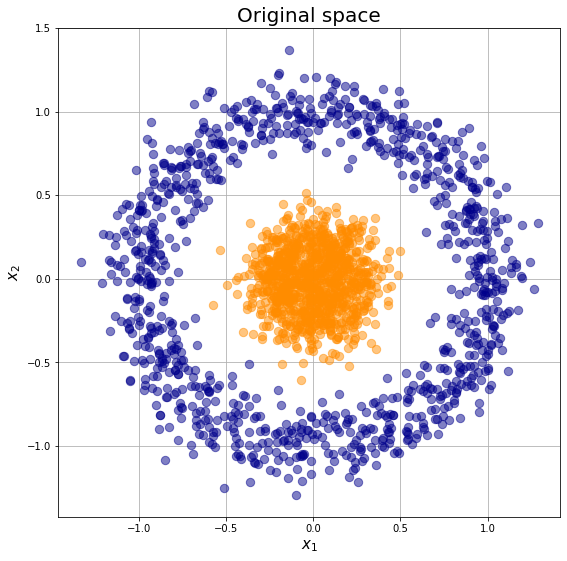

In [5]:
scatterplot(X, "Original space")

<br>
<br>

## Decision tree on original data

We first fit a decision tree to illustrate the complexity of the decision boundary between the classes located on the concentric circles. We are not interested in the model's predictive performance so we don't create a test set here.

### Fit decision tree

Note that we do not limit the tree's complexity.

In [6]:
tree = sklearn.tree.DecisionTreeClassifier(random_state=501)
tree = tree.fit(X, y)

In [7]:
print(f"tree depth = {tree.get_depth()}")
print(f"number of leaves = {tree.get_n_leaves()}")

tree depth = 7
number of leaves = 19


### Visualize decision boundary

In [8]:
def plot_boundary(x, tree, plot_step=0.02, margin=0.2):

    x_min, x_max = x[:, 0].min() - margin, x[:, 0].max() + margin
    y_min, y_max = x[:, 1].min() - margin, x[:, 1].max() + margin
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        "", ["#00008b1A", "#ff8c001A"]
    )
    plt.contourf(xx, yy, Z, cmap=cmap)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    mask_1 = y == 1
    plt.scatter(x[~mask_1, 0], x[~mask_1, 1], c="darkblue", s=70, alpha=0.5)
    plt.scatter(x[mask_1, 0], x[mask_1, 1], c="darkorange", s=70, alpha=0.5)

    plt.show()

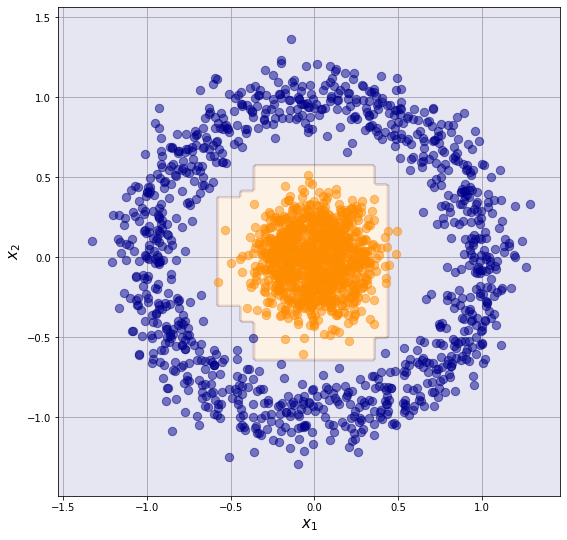

In [9]:
plot_boundary(X, tree)

### Visualize decision tree

Let's visualize all splits the tree made.

In [10]:
def plot_tree(tree):
    dot_data = sklearn.tree.export_graphviz(
        tree,
        out_file=None,
        feature_names=["x1", "x2"],
        class_names=["outer", "inner"],
        filled=True,
        rounded=True,
        special_characters=True,
    )
    return graphviz.Source(dot_data)

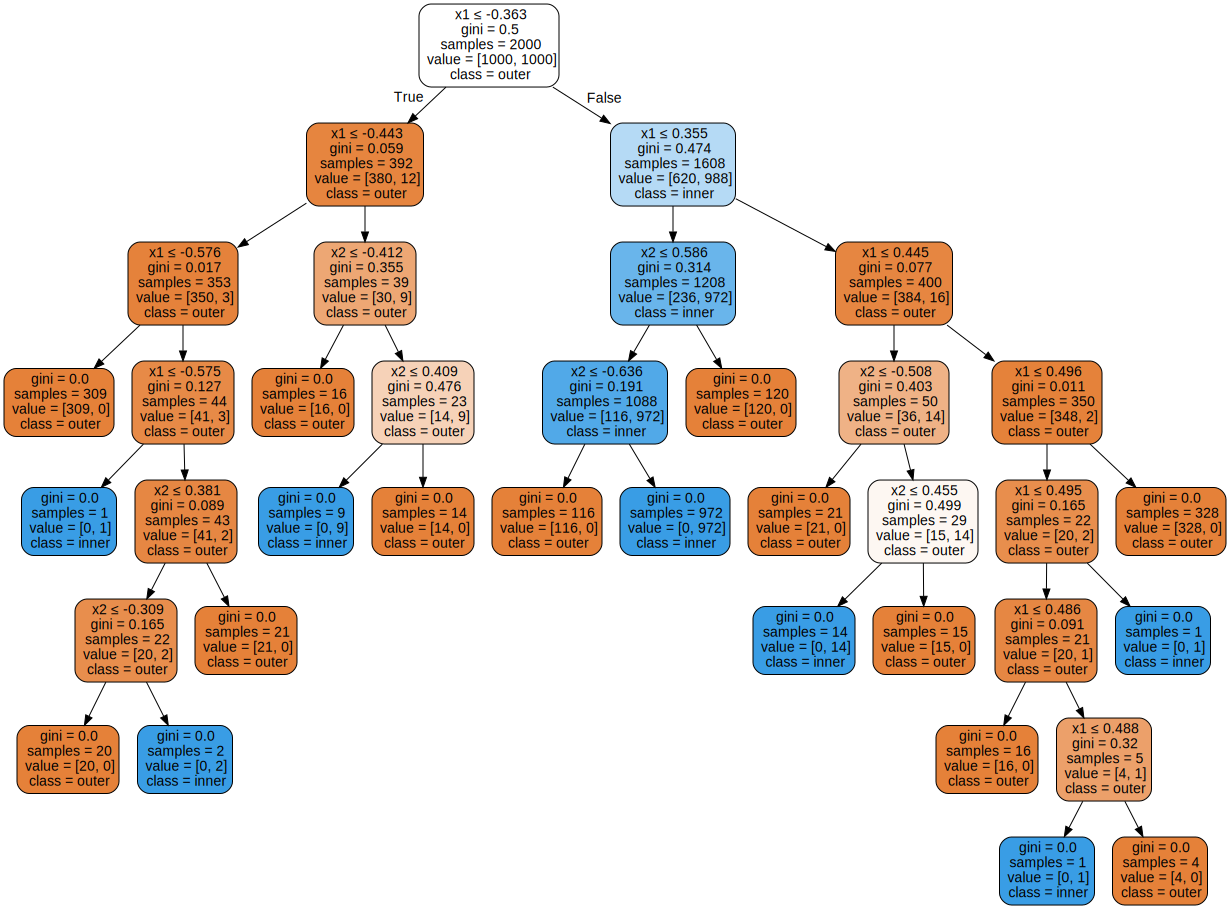

In [11]:
plot_tree(tree)

<img src="../img/hard.gif" width="800px">

[Full clip on YouTube](https://www.youtube.com/watch?v=ofGy1zuj2rM)

<br>
<br>

## Polar coordinate system

A theory-driven representation of the feature space

In [12]:
def cartesian2polar(x):
    """
    x is a 2D numpy array:
    - column 1 is cartesian dimension 1 `x`
    - column 2 is cartesian dimension 2 `y`
    """
    rho = np.sqrt(x[:, 0] ** 2 + x[:, 1] ** 2)
    phi = np.arctan2(x[:, 1], x[:, 0])
    return np.column_stack((rho, phi))


def polar2cartesian(polar):
    """
    x is a 2D numpy array:
    - column 1 is radius `rho`
    - column 2 is angle `phi`
    """
    x = polar[:, 0] * np.cos(polar[:, 1])
    y = polar[:, 0] * np.sin(polar[:, 1])
    return np.column_stack((x, y))

In [13]:
X_polar = cartesian2polar(X)
X_reconstructed = polar2cartesian(X_polar)
assert np.max(np.abs(X - X_reconstructed)) < 1e-12

### Plot

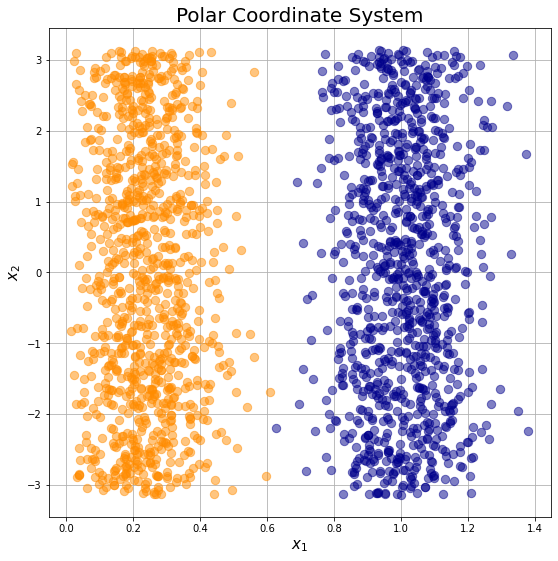

In [14]:
scatterplot(X_polar, "Polar Coordinate System")

### Fit decision tree

A decision tree is expressive enough to separate the two classes so this transformation is not necessary for building a sufficiently good classifier. However, this example shows that a much simpler model is sufficient for the transformed data.

In [15]:
tree_polar = sklearn.tree.DecisionTreeClassifier(random_state=501)
tree_polar = tree_polar.fit(X_polar, y)

In [16]:
print(f"tree depth = {tree_polar.get_depth()}")
print(f"number of leaves = {tree_polar.get_n_leaves()}")

tree depth = 1
number of leaves = 2


### Visualize decision boundary

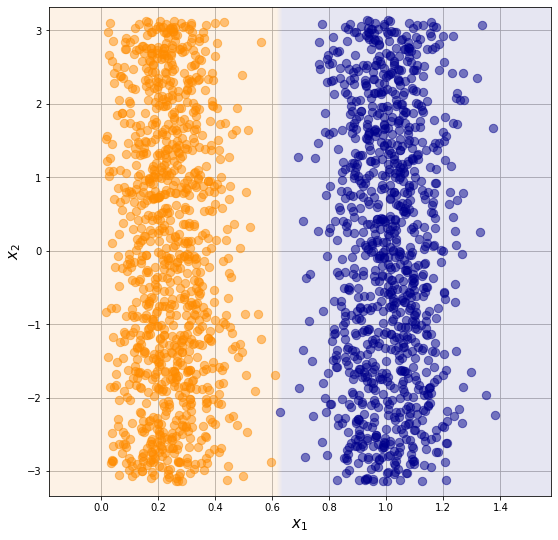

In [17]:
plot_boundary(X_polar, tree_polar)

### Visualize decision tree

A tree of depth one with only two leaf nodes suffices, all thanks to the much simpler decision boundary.

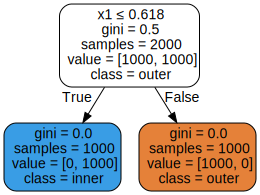

In [18]:
plot_tree(tree_polar)

<br>
<br>

## Kernel PCA

### Implementation with `sklearn`

This is a useful alternative to the polar coordinate system.

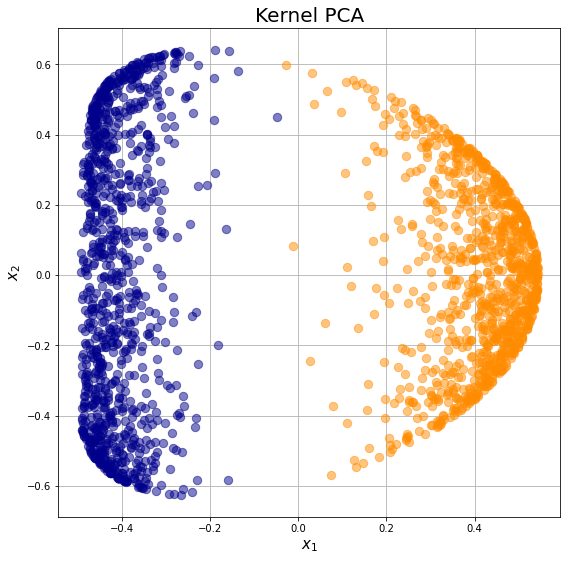

In [19]:
kpca = sklearn.decomposition.KernelPCA(
    n_components=2,
    kernel="rbf",
    gamma=2,
)
X_kpca = kpca.fit_transform(X)
scatterplot(X_kpca, "Kernel PCA")

### Fit decision tree

In [20]:
tree_kpca = sklearn.tree.DecisionTreeClassifier(random_state=501)
tree_kpca = tree_kpca.fit(X_kpca, y)

In [21]:
print(f"tree depth = {tree_kpca.get_depth()}")
print(f"number of leaves = {tree_kpca.get_n_leaves()}")

tree depth = 1
number of leaves = 2


### Visualize decision boundary

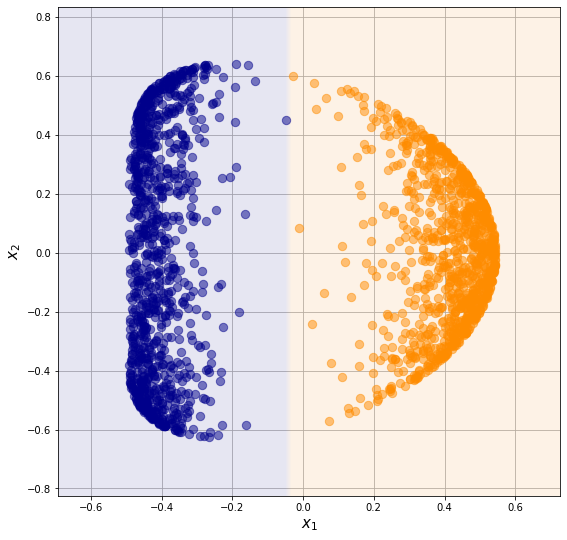

In [22]:
plot_boundary(X_kpca, tree_kpca)

### Visualize decision tree

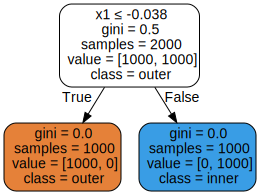

In [23]:
plot_tree(tree_kpca)

<br>
<br> 

## Lessons

1. The way we represent our data has a major impact on our models and results
1. We saw a(nother) good example for the trade-off between feature complexity and model complexity
1. The easiest and most useful way derive representations is to them on "theory"

<br>

&mdash; <br>
Dr. Sebastian Gabel <br>
Machine Learning in Marketing &ndash; Lecture 7 <br>
2020 <br>